# Cocaine Dependence

Paul Hendricks
2017-06-25

## Overview

In this vignette, we demonstrate the power of easyml using a Cocaine Dependence dataset.

## Load the data

First we load the easymlpy package and the Cocaine Dependence dataset.


In [1]:
from easymlpy.datasets import load_cocaine_dependence
from easymlpy import random_forest

%matplotlib inline

/Users/paulhendricks/miniconda3/envs/easyml/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
cocaine_dependence = load_cocaine_dependence()
print(cocaine_dependence.head())

   subject  diagnosis  age  male  edu_yrs  imt_comm_errors  imt_omis_errors  \
0    20031          0   29     0       16             6.90             5.51   
1    20044          0   33     0       17            15.63            13.27   
2    20053          0   57     0       13            25.44            16.41   
3    20060          0   26     1       18             7.38             6.25   
4    20066          0   38     0       13            31.54            10.09   

   a_imt  b_d_imt  stop_ssrt  lnk_adjdd  lkhat_kirby  revlr_per_errors  \
0   0.97    -0.12      346.3  -5.848444    -5.227870                 2   
1   0.92    -0.09      303.4  -9.026670    -5.832566                 1   
2   0.87    -0.27      214.6  -6.115988    -4.014322                 5   
3   0.96    -0.09      190.2  -7.771655    -5.272179                 3   
4   0.88    -0.61      273.9  -5.791561    -3.102204                 5   

   bis_attention  bis_motor  bis_nonpl  igt_total  
0             11         21 

## Train a random forest model

To run an easy_random_forest model, we pass in the following parameters:

* the data set `cocaine_dependence`,
* the name of the dependent variable e.g. `diagnosis`,
* whether to run a gaussian or a binomial model,
* which variables to exclude from the analysis,
* which variables are categorical variables; these variables are not scaled, if `preprocess_scale` is used,
* the random state,
* whether to display a progress bar,
* how many cores to run the analysis on in parallel.

In [3]:
# Analyze data
results = random_forest.easy_random_forest(cocaine_dependence, 'diagnosis',
                                           family='binomial',
                                           exclude_variables=['subject'],
                                           categorical_variables=['male'], 
                                           n_samples=10, n_divisions=10, 
                                           n_iterations=10, progress_bar=False, 
                                           random_state=12345, n_core=1)

Generating variable importances from multiple model builds:
Generating predictions for a single train test split:
Generating measures of model performance over multiple train test splits:


## Assess results

Now let’s assess the results of the easy_random_forest model.

## Estimates of variable importances

First, let's examine the estimates of the variable importances.

(<matplotlib.figure.Figure object at 0x106e5e4a8>, <matplotlib.axes._subplots.AxesSubplot object at 0x10cdce4a8>)


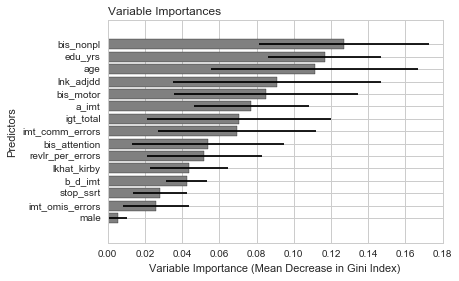

In [4]:
print(results.plot_variable_importances())

## Predictions

We can examine both the in-sample and out-of-sample ROC curve plots for one particular trian-test split determined by the random state and determine the Area Under the Curve (AUC) as a goodness of fit metric. Here, we see that the in-sample AUC is higher than the out-of-sample AUC, but that both metrics indicate the model fits relatively well.

(<matplotlib.figure.Figure object at 0x10f9751d0>, <matplotlib.axes._subplots.AxesSubplot object at 0x10f9634e0>)


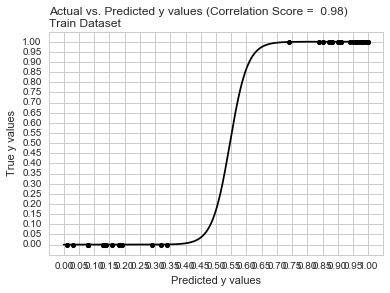

In [5]:
print(results.plot_predictions_single_train_test_split_train())

(<matplotlib.figure.Figure object at 0x10fc115c0>, <matplotlib.axes._subplots.AxesSubplot object at 0x10fa56c88>)


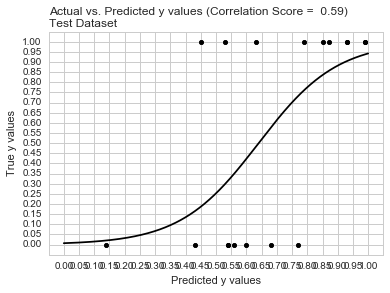

In [6]:
print(results.plot_predictions_single_train_test_split_test())

# ROC Curve

We can examine both the in-sample and out-of-sample ROC curve plots for one particular trian-test split determined by the random state and determine the Area Under the Curve (AUC) as a goodness of fit metric. Here, we see that the in-sample AUC is higher than the out-of-sample AUC, but that both metrics indicate the model fits relatively well.

(<matplotlib.figure.Figure object at 0x10fc39b38>, <matplotlib.axes._subplots.AxesSubplot object at 0x10fd9c6a0>)


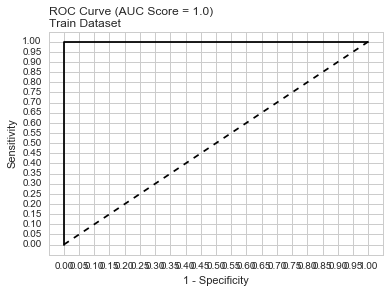

In [7]:
print(results.plot_roc_single_train_test_split_train())

(<matplotlib.figure.Figure object at 0x11000a7b8>, <matplotlib.axes._subplots.AxesSubplot object at 0x10fdc0c18>)


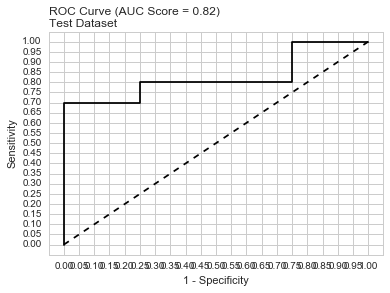

In [8]:
print(results.plot_roc_single_train_test_split_test())

## Model Performance

We can examine both the in-sample and out-of-sample AUC metrics for n_divisions train-test splits (ususally defaults to 1,000). Again, we see that the in-sample AUC is higher than the out-of-sample AUC, but that both metrics indicate the model fits relatively well.

(<matplotlib.figure.Figure object at 0x11019aba8>, <matplotlib.axes._subplots.AxesSubplot object at 0x110020ba8>)


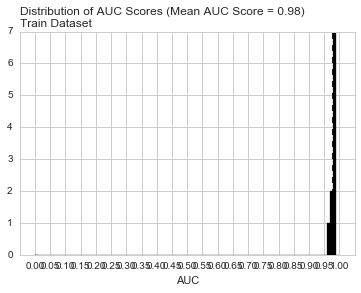

In [9]:
print(results.plot_model_performance_train())

(<matplotlib.figure.Figure object at 0x10fda66d8>, <matplotlib.axes._subplots.AxesSubplot object at 0x10f7e8518>)


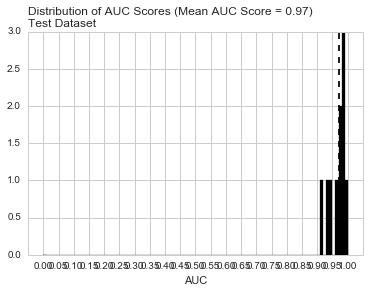

In [10]:
print(results.plot_model_performance_test())

## Discuss

In this vignette we used easyml to easily build and evaluate a random forest model using a Cocaine Dependence dataset.
